# ROBOLOAN

## Description

Application, which analyzes past financial characteristics of consumers, defines a risk level using machine learning models and approves loans autonomously. The idea of automatization of loan is getting popular. If we take a look in 50 successful FinTechs on Forbes, we can see that 8% of that projects are in lending branch with above 1 Billion fundings in 2019. The idea already exists. The analogies are: Lending Club, Pay in 4, After Pay etc. Our purpose is to program the backend application to understand the process of loan automatisation using AI models.   

## Objectives

- Automate loan submission process
- Reduce time and cost of financial operations: Ease of loan application and rapid decision
- Encourage small loans and also develop a “buy now, pay later” product

## Tasks of Application

- Analyze the credit risk
- Train on positive decisions
- Predict the default risk
- Test the accuracy of the prediction
- Ability to approve loans autonomously

## 1. Data

In [396]:
# import needed libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk

from scipy import stats


### 1.1 Data description

About Lending Club, Establishment, Pholosophy, values ...

The data set which we are intending to use originally consist of two seperated data sets: Data set of approved loans and the rejected applications. The data sets represent data of above 1 million loan applicants of Lending Club Company from 2007 till 2018. The first data set is about the accepted approved loans with 150 features, which provides wide opportunity to build diverse applications in field of finance. 

However, the amount of the features in the second data set is restricted to only nine features. This understandible that applicants wouldn't be graded or have installment plan or predefined terms (duration), or submittted loan amount etc, because of the rejection.  

The original data from the Lending Club webpage were gathered, updated and uploaded by Nathan George on https://www.kaggle.com/wordsforthewise. 

For the purpose of process efficeincy and because of technical restrictions, our sample uses only 10% of population (both data sets) for prediction model.

In [397]:
# Review the first data set: Accepted loans

original_data_1 = pd.read_csv('accepted_2007_to_2018_100T.csv', low_memory=False)
original_data_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;


In [398]:
# Review the second data set: Rejected loans

original_data_2 = pd.read_csv('rejected_2007_to_2018_100T.csv', low_memory=False, encoding="ISO-8859-1")
original_data_2.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0;;
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0;;
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0;;
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0;;
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0;;


### 1.2 Attributes' Explanation 
 
For the clarity of the working process and transparency of prediction we use traditional loan submission criteria.  

Why these attributes? We have to have the same attributes in both data sets? Is it possible to work only with accepted loans and every application out of these scopes has to be rejected?

In [399]:
# remove all columns and rows with NaN values and choose needed attributes

data_accepted = original_data_1[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 
                     'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'open_acc', 'dti', 'total_acc', 
                     'fico_range_low', 'fico_range_high', 'addr_state', 'policy_code']]
data_accepted = data_accepted.dropna()

data_accepted.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,open_acc,dti,total_acc,fico_range_low,fico_range_high,addr_state,policy_code
0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,7.0,5.91,13.0,675.0,679.0,PA,1.0
1,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,22.0,16.06,38.0,715.0,719.0,SD,1.0
2,20000.0,60 months,10.78,432.66,B,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,6.0,10.78,18.0,695.0,699.0,IL,1.0
3,35000.0,60 months,14.85,829.90,C,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,13.0,17.06,17.0,785.0,789.0,NJ,1.0
4,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,12.0,25.37,35.0,695.0,699.0,PA,1.0
5,11950.0,36 months,13.44,405.18,C,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,5.0,10.20,6.0,690.0,694.0,GA,1.0
6,20000.0,36 months,9.17,637.58,B,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,12.0,14.67,27.0,680.0,684.0,MN,1.0
7,20000.0,36 months,8.49,631.26,B,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,major_purchase,8.0,17.61,15.0,705.0,709.0,SC,1.0
8,10000.0,36 months,6.49,306.45,A,6 years,RENT,85000.0,Not Verified,Dec-2015,Fully Paid,credit_card,14.0,13.07,23.0,685.0,689.0,PA,1.0
9,8000.0,36 months,11.48,263.74,B,10+ years,MORTGAGE,42000.0,Not Verified,Dec-2015,Fully Paid,credit_card,8.0,34.80,18.0,700.0,704.0,RI,1.0


In [400]:
# list of attributes of accepted loans dataset 

data_accepted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92941 entries, 0 to 100001
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            92941 non-null  float64
 1   term                 92941 non-null  object 
 2   int_rate             92941 non-null  float64
 3   installment          92941 non-null  float64
 4   grade                92941 non-null  object 
 5   emp_length           92941 non-null  object 
 6   home_ownership       92941 non-null  object 
 7   annual_inc           92941 non-null  float64
 8   verification_status  92941 non-null  object 
 9   issue_d              92941 non-null  object 
 10  loan_status          92941 non-null  object 
 11  purpose              92941 non-null  object 
 12  open_acc             92941 non-null  float64
 13  dti                  92941 non-null  float64
 14  total_acc            92941 non-null  float64
 15  fico_range_low       92941 non-null

In [401]:
# Attribute explanation of acccepted loans

att_file = pd.read_csv('Explanation.csv')
att_file

,Attribute,Type,Description
0,loan_amnt,Numerical,The listed amount of the loan applied
1,term,Numerical (months),The duration of loan or number of payments on...
2,int_rate,Numerical (percentage),Interest rate on the loan
3,installment,Numerical,The monthly payment owed by the borrowed
4,grade,Categorical,Assigned loan grade


In [402]:
# function for ordinal variables like employment lenght and grade

def ordinal_feature(data, columns):
    """ 
        - Takes only ordinal variables (in quantative or alphabetic order) to convert it into integer
        - Important: Takes two arguments
    """
    for column in columns:
        converted_order = []
        count = 0
        values = list(data[column].unique())
        values = sorted(values)
        for value in values:
            value = str(value)
            if value.startswith("<"):
                converted_order.insert(0, value)
            elif "+" in value:
                converted_order.insert(count + 1, value)
            else:
                converted_order.insert(count, value)
                count += 1
        data[column] = data[column].apply(lambda x: converted_order.index(x))

In [403]:
ordinals = ["grade", "emp_length"]
ordinal_feature(data_accepted, ordinals)

data_accepted.head(5)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,open_acc,dti,total_acc,fico_range_low,fico_range_high,addr_state,policy_code
0,3600.0,36 months,13.99,123.03,2,10,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,7.0,5.91,13.0,675.0,679.0,PA,1.0
1,24700.0,36 months,11.99,820.28,2,10,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,22.0,16.06,38.0,715.0,719.0,SD,1.0
2,20000.0,60 months,10.78,432.66,1,10,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,6.0,10.78,18.0,695.0,699.0,IL,1.0
3,35000.0,60 months,14.85,829.90,2,10,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,13.0,17.06,17.0,785.0,789.0,NJ,1.0
4,10400.0,60 months,22.45,289.91,5,3,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,12.0,25.37,35.0,695.0,699.0,PA,1.0


In [404]:
# Rolling Statistics of accepted loans

data_accepted.describe().round(4)

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,open_acc,dti,total_acc,fico_range_low,fico_range_high,policy_code
count,92941.0000,92941.0000,92941.0000,92941.0000,92941.0000,9.294100e+04,92941.0000,92941.0000,92941.0000,92941.0000,92941.0000,92941.0
mean,15238.7030,12.2113,439.0266,1.6886,5.9829,7.981771e+04,12.0293,19.1585,25.3345,694.4517,698.4519,1.0
std,8646.8153,4.1399,246.5784,1.2463,3.7415,9.152375e+04,5.7006,8.8079,12.1290,30.6030,30.6036,0.0
min,1000.0000,5.3200,14.7700,0.0000,0.0000,3.800000e+03,1.0000,0.0000,4.0000,660.0000,664.0000,1.0
25%,8475.0000,9.1700,260.5500,1.0000,2.0000,4.900000e+04,8.0000,12.5500,17.0000,670.0000,674.0000,1.0
50%,14000.0000,11.9900,382.5500,2.0000,6.0000,6.800000e+04,11.0000,18.6200,24.0000,685.0000,689.0000,1.0
75%,20000.0000,14.4800,577.7900,2.0000,10.0000,9.500000e+04,15.0000,25.4200,32.0000,710.0000,714.0000,1.0
max,35000.0000,28.9900,1354.6600,6.0000,10.0000,9.000000e+06,67.0000,380.5300,135.0000,845.0000,850.0000,1.0


In [405]:
# Choose the needed features from original rejected data set and clear from NaN values
data_rejected = original_data_2[['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score', 'Debt-To-Income Ratio', 'Employment Length', 
                                 'State', 'Policy Code;;']]
data_rejected = data_rejected.dropna()

# remove the persentage and unneeded signs from the values
data_rejected['Debt-To-Income Ratio'] =  data_rejected['Debt-To-Income Ratio'].str.strip('%').astype('float')
data_rejected['Policy Code;;'] = data_rejected['Policy Code;;'].str.strip(';;').astype('float')

# convert the values to numerical type
data_rejected['Amount Requested'] = data_rejected['Amount Requested'].astype('float')
data_rejected['Risk_Score'] = data_rejected['Risk_Score'].astype('float')

In [406]:
# convert ordinal features to numeric order 
ordinals = ["Employment Length"]
ordinal_feature(data_rejected, ordinals)

data_rejected.head(10)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Employment Length,State,Policy Code;;
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10.00,4,NM,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10.00,0,MA,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10.00,1,MD,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64,0,MA,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43,0,MD,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0.00,3,NY,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10.00,0,MD,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10.00,2,IN,0.0
8,3000.0,2007-05-28,title?,694.0,10.00,4,CO,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76,4,KY,0.0


In [407]:
# Attribute explanations of rejected loans? 

data_rejected.describe().round(2)

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Policy Code;;
count,88947.00,88947.00,88947.00,88947.00,88947.0
mean,10085.96,579.99,958.16,3.47,0.0
std,7640.68,169.81,33715.90,3.52,0.0
min,500.00,0.00,-1.00,0.00,0.0
25%,4000.00,524.00,4.60,0.00,0.0
50%,7700.00,628.00,16.43,2.00,0.0
75%,15000.00,683.00,30.44,6.00,0.0
max,40000.00,828.00,3967200.00,10.00,0.0


In [408]:
data_rejected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88947 entries, 0 to 100000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount Requested      88947 non-null  float64
 1   Application Date      88947 non-null  object 
 2   Loan Title            88947 non-null  object 
 3   Risk_Score            88947 non-null  float64
 4   Debt-To-Income Ratio  88947 non-null  float64
 5   Employment Length     88947 non-null  int64  
 6   State                 88947 non-null  object 
 7   Policy Code;;         88947 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.1+ MB


### 1.3 Merge both data sets

- we are intending to test different machine learning models
- For this purpose we need data in different forms 
- One data set with similar features with rejected and accepted loans also can be used for prediction to test how accurate it is

In [409]:
# Generelize the common features of both data sets 
common_features = {"loan_amnt":"Loan Amount", "Amount Requested":"Loan Amount", "issue_d": "Application Date", 
                   "purpose": "Loan Title", "dti": "Debt-To-Income Ratio", "emp_length": "Employment Length",
                   "addr_state": "State", "Policy Code;;": "Policy Code", "policy_code": "Policy Code"}

# Attribute Risk score is in different form. In accepted data it is splited in low and high fico range. We take the mean of them
data_accepted["Risk_Score"] = data_accepted[['fico_range_low', 'fico_range_high']].mean(axis=1)
data_accepted = data_accepted.drop(['fico_range_low', 'fico_range_high'], axis=1)
"""
'loan_amnt', 'issue_d',  ? problem
'Amount Requested', 'Application Date',
""" 
data_accepted = data_accepted.rename(columns=common_features)
data_rejected = data_rejected.rename(columns=common_features)

data_accepted_m = data_accepted

for i in data_accepted_m.columns:
    if i not in data_rejected.columns:
        data_accepted_m = data_accepted_m.drop([i], axis=1)
        
merged_data = pd.concat([data_accepted_m, data_rejected], ignore_index=True, sort=True)
merged_data.head(10)

,Application Date,Debt-To-Income Ratio,Employment Length,Loan Amount,Loan Title,Policy Code,Risk_Score,State
0,Dec-2015,5.91,10,3600.0,debt_consolidation,1.0,677.0,PA
1,Dec-2015,16.06,10,24700.0,small_business,1.0,717.0,SD
2,Dec-2015,10.78,10,20000.0,home_improvement,1.0,697.0,IL
3,Dec-2015,17.06,10,35000.0,debt_consolidation,1.0,787.0,NJ
4,Dec-2015,25.37,3,10400.0,major_purchase,1.0,697.0,PA
5,Dec-2015,10.20,4,11950.0,debt_consolidation,1.0,692.0,GA
6,Dec-2015,14.67,10,20000.0,debt_consolidation,1.0,682.0,MN
7,Dec-2015,17.61,10,20000.0,major_purchase,1.0,707.0,SC
8,Dec-2015,13.07,6,10000.0,credit_card,1.0,687.0,PA
9,Dec-2015,34.80,10,8000.0,credit_card,1.0,702.0,RI


In [410]:
merged_data.tail(10)

,Application Date,Debt-To-Income Ratio,Employment Length,Loan Amount,Loan Title,Policy Code,Risk_Score,State
181878,2010-03-10,6.60,1,25000.0,home_improvement,0.0,531.0,NJ
181879,2010-03-10,43.45,10,25000.0,debt_consolidation,0.0,732.0,MI
181880,2010-03-10,16.67,1,12000.0,other,0.0,673.0,NM
181881,2010-03-10,5.59,2,5000.0,Debt Consolidation Loan,0.0,664.0,CA
181882,2010-03-10,45.01,10,15000.0,debt_consolidation,0.0,672.0,NJ
181883,2010-03-10,26.96,10,25000.0,small_business,0.0,670.0,MA
181884,2010-03-10,64.48,10,4000.0,credit_card,0.0,676.0,PA
181885,2010-03-10,21.90,3,5000.0,debt_consolidation,0.0,606.0,AZ
181886,2010-03-10,31.33,5,2800.0,debt_consolidation,0.0,727.0,FL
181887,2010-03-10,27.77,10,20000.0,debt_consolidation,0.0,686.0,VT


In [411]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181888 entries, 0 to 181887
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Application Date      181888 non-null  object 
 1   Debt-To-Income Ratio  181888 non-null  float64
 2   Employment Length     181888 non-null  int64  
 3   Loan Amount           181888 non-null  float64
 4   Loan Title            181888 non-null  object 
 5   Policy Code           181888 non-null  float64
 6   Risk_Score            181888 non-null  float64
 7   State                 181888 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 11.1+ MB


## 2. Descriptive statistics


- Loan amount: find the maximum and minimum amount of borrowed money. Frequency of different amounts and mean.

- It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies.

Rantangular data 
Outcoume - dependent variable, response, target, output
record - case, example, instance, observation, pattern, sample

#### Estimates of location

A trimmed mean eliminates the influence of extreme values. 

Being an outlier in itself does not make a data value invalid or erroneous (as in the previous example with Bill Gates). Still, outliers are often the result of data errors such as mixing data of different units (kilometers versus meters) or bad readings from a sensor.
The trimmed mean requires the trim_mean function in scipy.stats: trim_mean(state['Population'], 0.1), (trim=0.1 drops 10% from each end).

Anomaly detection the points of interest are the outliers, and the greater mass of data serves primarily to define the “normal” against which anomalies are measured.

#### Estimates of Variability

Location is just one dimension in summarizing a feature. A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out.
Deviations
The difference between the observed values and the estimate of location. Synonyms: errors, residuals

Variance
The sum of squared deviations from the mean divided by n – 1 where n is the number of data values. Synonym: mean-squared-error

Standard deviation
The square root of the variance. 
They are all sensitive to outlliers. 

The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data.

#### Exploring the Data Distribution

In [412]:
# Style, font and formats for plotting discriptive statistics
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = '14'

### 2.1 Loan and interest rate

- Plot distribution of loan amount and interest rate. 
- Define outliers, frequencies
- Purpose and duration, loan status 

Text(0.5, 1.0, 'Loan Title')

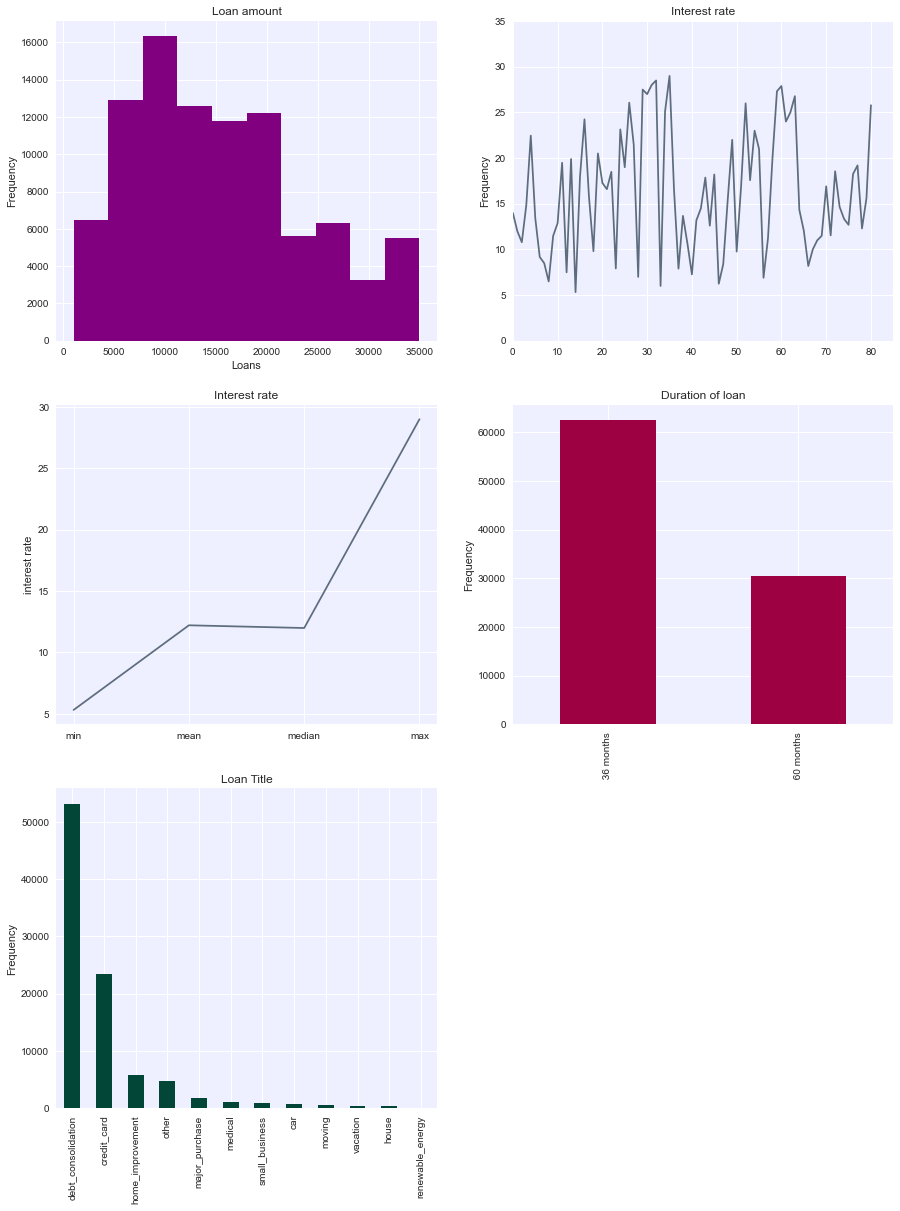

In [414]:
plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1, facecolor = '#eeefff')
plt.hist(data_accepted['Loan Amount'], color='#800080')
plt.xlabel('Loans')
plt.ylabel('Frequency')
plt.title('Loan amount')

# Interest rate
plt.subplot(3, 2, 2, facecolor = '#eeefff')
plt.plot(data_accepted['int_rate'].unique(), color='#5D6D7E')
plt.title('Interest rate')
plt.ylabel("Frequency")
plt.ylim(0, 35)
plt.xlim(0, 85)

# Interest rate2
plt.subplot(3, 2, 3, facecolor = '#eeefff')
plt.plot(data_accepted['int_rate'].aggregate([min, np.mean, np.median, max]), color='#5D6D7E')
plt.title('Interest rate')
plt.ylabel("interest rate")

# Duration of loan
plt.subplot(3, 2, 4, facecolor='#eeefff')
data_accepted['term'].value_counts().plot(kind='bar', colormap='Spectral')
plt.ylabel('Frequency')
plt.title('Duration of loan')

# Purpose of taking loan
plt.subplot(3, 2, 5, facecolor='#eeefff')
data_accepted['Loan Title'].value_counts().plot(kind='bar', colormap='PuBuGn_r')
plt.ylabel('Frequency')
plt.title('Loan Title')


### 2.2 Other important features
- DTI
- Grades
- Risk score
- Homeownership 
- State

In [ ]:
# Frequency of the loans' amount
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1, facecolor = '#eeefff')
plt.scatter(data_accepted['loan_amnt'], data_accepted['int_rate'], color='#800080')
plt.xlabel('Loans')
plt.ylabel('Frequency')
plt.title('Loan amount')

# Interest rate
plt.subplot(4, 2, 2, facecolor = '#eeefff')
plt.plot(data_accepted['int_rate'].unique(), color='#5D6D7E')
plt.title('Interest rate')
plt.ylabel("Frequency")
plt.ylim(0, 35)
plt.xlim(0, 85)

# Interest rate2
plt.subplot(4, 2, 3, facecolor = '#eeefff')
plt.plot(data_accepted['int_rate'].aggregate([min, np.mean, np.median, max]), color='#5D6D7E')
plt.title('Interest rate')
plt.ylabel("interest rate")

# Information about grades frequency 
plt.subplot(4, 2, 4, facecolor = '#eeefff')
data_accepted['grade'].groupby(data_accepted['grade']).count().plot(kind='bar', colormap='Spectral')
plt.ylabel('Frequency')
plt.title('Grades')

# Duration of loan
plt.subplot(4, 2, 5, facecolor='#eeefff')
data_accepted['term'].value_counts().plot(kind='bar', colormap='Spectral')
plt.ylabel('Frequency')
plt.title('Duration of loan')

# Information about home ownership of applicants
plt.subplot(4, 2, 6, facecolor = '#eeefff')
data_accepted['home_ownership'].value_counts().plot(kind='bar', colormap='Spectral_r')
plt.ylabel('Frequency')
plt.title('Home ownership')

# Purpose of taking loan
plt.subplot(4, 2, 7, facecolor='#eeefff')
data_accepted['purpose'].value_counts().plot(kind='bar', colormap='PuBuGn_r')
plt.ylabel('Frequency')
plt.title('Purpose')

### 2.2 Correlation

In [ ]:
# function for plotting correlation matrices

def correlation_matrix(data):
    """ 
        Takes as an input a data set.
        Plots correlation matrix
    """
    labels_cr = data.columns
    corr_table = np.array(data.round(3))
    
    fig, ax = plt.subplots(figsize=(10, 12))
    ax.imshow(corr_table, cmap='twilight_shifted')
    
    ax.set_xticks(np.arange(len(labels_cr)))
    ax.set_yticks(np.arange(len(labels_cr)))
    ax.set_xticklabels(labels_cr)
    ax.set_yticklabels(labels_cr)
    ax.grid(False)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)

    for i in range(len(labels_cr)):
        for j in range(len(labels_cr)):
            text = ax.text(j, i, corr_table[i, j], ha='center', va='center', color='w', fontsize=14)
        
    ax.set_title("Correlation of features".upper(), fontsize=14)
    fig.tight_layout()  

    fig.colorbar(ax.imshow(corr_table, cmap='twilight_shifted'), orientation='horizontal', label='Correlation')

In [ ]:
# correlation of features of the accepted loan data set

data_accepted.corr().round(4)

In [ ]:
# Correlation matrix plot of accepted loan data set

correlation_matrix(data_accepted.corr())

In [ ]:
data_rejected.corr()

In [ ]:
correlation_matrix(data_rejected.corr())

## 3. Implementing Machine learning models


Although we have already risk scores and loan status in our data set, which means that the data already contains what the ML algorithm is supposed to learn. However, we start with unsupervised learning models.  

### 3.1 Data preparation for ML models

### 3.2 K-means model

    - if we take the loan status as an outcome feature, the most proper model will be k-means clustering because the loan status attribute can be devided into 5 clusters describing the status credit holders.

In [ ]:
# GAUSSIAN NAIVE BAYES

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


n_samples = 100

X, y = make_classification(n_samples=n_samples, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    n_repeated=0, random_state=250)

model = GaussianNB()

model.fit(X, y)

model.predict_proba(X).round(4)[:5]

pred = model.predict(X)

pred

In [ ]:
pred == y

In [ ]:
accuracy_score(y, pred)

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X);
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm');

In [ ]:
Xc = X[y == pred]
Xf = X[y != pred]

plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred], cmap="coolwarm")
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred], marker='x', cmap='coolwarm')


## 3.2 Another one

### TO DO

#### Combinations

- Combination of purpose and interest rate? How they are related and what can we retreive from it?
- Combination of grades and loan amount
- Combination of Home ownership and loan amount
- Loan amount and interst rate
- annual income and loan amount
- annual income and interest rate
- Employment lenght 
- Fully paid and current

### models
- K-means model: we can take the loan status as clusters. Our prodiction has to be the number of cluster.
- 

#### Others: 
- all features to numbers
- age attribute? 
- we could decompose the summery statistics into loan(duration, interest rate, amount, purpose), risk (Homeowner, grade, income, previous credits, open credits)
- one y axis for common frequencies
- Correlation matrix
- List of attributes' explanation (we could create dictionary)
- Explanation of plots and findings
- description of Lending Club: Business and policy.  
- Risk score for accepted data are fico_scores?
- Can we calculate annual income out of Debt income ratio? 
- Arguments for choosing the attributes
- complete attributes' explanation file 

In [ ]:
def is_prime(I):
    if I % 2 == 0: return False
    for i in range (3, int(I ** 0.5) + 1, 2):
        if I % i == 0: 
            print("Stops at: ", i)
            print("It is not a prime number!")
            return False
    return True

        

In [ ]:
n = int(10010910)
is_prime(n)

In [ ]:
%time is_prime(n)

In [ ]:
import numba

is_prime_nb = numba.jit(is_prime)
%time is_prime_nb(n)

### References

- https://pandas.pydata.org
- https://learning.oreilly.com/library/view/python-for-finance/9781492024323/ch13.html
- https://matplotlib.org
- https://www.kaggle.com/wordsforthewise